<a href="https://colab.research.google.com/github/aikokass82-design/home-tasks-/blob/main/Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Дипломный проект**

***часть 1***

In [1]:
import pandas as pd
import sqlalchemy
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
engine = sqlalchemy.create_engine("sqlite+pysqlite:////content/drive/MyDrive/Colab Notebooks/sales_land_auctions.db", echo=False)

Mounted at /content/drive


In [2]:
query = sqlalchemy.text("""
SELECT *
FROM auctions
""")
table_part = pd.read_sql(query, con=engine)
table_part.head(5)

,auction_id,classificator,additional_classificator,lot_description,land_area,cadastral_number,property_type,start_price,sale_price,customer_edrpou,auction_date,expert_eval_price,lot_address,Latitude,Longitude,oblast,mortgage
0,LSE001-UA-20231006-40023,06111000-3,007.01,Земельна ділянка несільськогосподарського приз...,0.0543,4623610100:02:002:0598,Комунальна,417024.0,459832.0,4372187,2023-11-14,417024.0,"81105 Україна, Львівська область, ПУСТОМИТИ, ,...",49.747980,23.924056,Львівська,0
1,LSE001-UA-20231005-11653,06128000-5,011.00,"Продаж земельної ділянки площею 4,2089 га, кад...",4.2089,7324510100:04:001:0188,Комунальна,3513169.0,4601000.0,4062179,2023-11-13,3513169.0,"59000 Україна, Чернівецька область, Сторожинец...",48.163418,25.718429,Чернівецька,0
2,LSE001-UA-20231010-55788,06112000-0,03.08,Продаж права власності земельної ділянки площе...,0.0150,7110136400:01:012:0028,Комунальна,472800.0,520000.0,38715770,2023-11-10,472800.0,"18018 Україна, Черкаська область, Черкаси, вул...",49.439875,32.082112,Черкаська,0
3,LSE001-UA-20231006-45605,06128000-5,11.02,Продаж земельної ділянки несільськогосподарськ...,0.1224,4610300000:14:040:0108,Комунальна,190592.0,192592.0,26181298,2023-11-08,190592.0,"82300 Україна, Львівська область, м.Борислав, ...",49.300083,23.422556,Львівська,0
4,LSE001-UA-20231006-90766,06128000-5,11.02,Продаж земельної ділянки несільськогосподарськ...,0.0429,4610300000:14:040:0107,Комунальна,67182.0,70000.0,26181298,2023-11-08,67182.0,"82300 Україна, Львівська область, м.Борислав, ...",49.297918,23.425799,Львівська,0


In [3]:
query = sqlalchemy.text("""
SELECT *
FROM classificator
""")
table_part = pd.read_sql(query, con=engine)
table_part.head(5)

,classificator_code,classificator_description,classificator_class
0,06111000-3,"Землі житлової забудови (землі, які використо...",housing
1,06128000-5,"Землі промисловості, транспорту, зв'язку, ене...",industry_infrastructure
2,06112000-0,"Землі громадської забудови (землі, які викори...",public_development
3,06121000-6,Землі сільськогосподарського призначення,agriculture
4,06124000-7,Землі рекреаційного призначення,recreational


In [4]:
query = sqlalchemy.text("""
SELECT *
FROM additional_classificator
""")
table_part = pd.read_sql(query, con=engine)
table_part.head(5)

,code,code_description
0,007.01,Малоповерхова забудова
1,011.00,Землі під промисловою забудовою
2,03.08,Для будівництва та обслуговування об'єктів тур...
3,11.02,"Для розміщення та експлуатації основних, підсо..."
4,12.04,Для розміщення та експлуатації будівель і спор...


In [5]:
query = sqlalchemy.text("""
SELECT *
FROM customers
""")
table_part = pd.read_sql(query, con=engine)
table_part.head(5)

,customer_edrpou,customer_name,customer_address
0,4372187,Пустомитівська міська рада Львівського району ...,"81100 Україна, м.Пустомити, Львівська область,..."
1,4062179,СТОРОЖИНЕЦЬКА МІСЬКА РАДА,"59000 Україна, Сторожинець, Чернівецька област..."
2,38715770,Департамент архітектури та містобудування Черк...,"18000 Україна, Черкаси, Черкаська область, Бай..."
3,26181298,Бориславська міська рада,"82300 Україна, м. Борислав, Львівська область,..."
4,4051336,ЛЮБОМЛЬСЬКА МІСЬКА РАДА,"44300 Україна, м.Любомль, Волинська область, в..."


***часть 2***

In [6]:
auctions = pd.read_sql("SELECT * FROM auctions", engine)
customers = pd.read_sql("SELECT * FROM customers", engine)
classificator = pd.read_sql("SELECT * FROM classificator", engine)
additional_classificator = pd.read_sql("SELECT * FROM additional_classificator", engine)

df = auctions.merge(customers, how='left', on='customer_edrpou')

df = df.merge(classificator, how='left', left_on='classificator', right_on='classificator_code')

df = df.merge(additional_classificator, how='left', left_on='additional_classificator', right_on='code')

df

,auction_id,classificator,additional_classificator,lot_description,land_area,cadastral_number,property_type,start_price,sale_price,customer_edrpou,...,Longitude,oblast,mortgage,customer_name,customer_address,classificator_code,classificator_description,classificator_class,code,code_description
0,LSE001-UA-20231006-40023,06111000-3,007.01,Земельна ділянка несільськогосподарського приз...,0.0543,4623610100:02:002:0598,Комунальна,417024.0,459832.0,4372187,...,23.924056,Львівська,0,Пустомитівська міська рада Львівського району ...,"81100 Україна, м.Пустомити, Львівська область,...",06111000-3,"Землі житлової забудови (землі, які використо...",housing,007.01,Малоповерхова забудова
1,LSE001-UA-20231005-11653,06128000-5,011.00,"Продаж земельної ділянки площею 4,2089 га, кад...",4.2089,7324510100:04:001:0188,Комунальна,3513169.0,4601000.0,4062179,...,25.718429,Чернівецька,0,СТОРОЖИНЕЦЬКА МІСЬКА РАДА,"59000 Україна, Сторожинець, Чернівецька област...",06128000-5,"Землі промисловості, транспорту, зв'язку, ене...",industry_infrastructure,011.00,Землі під промисловою забудовою
2,LSE001-UA-20231010-55788,06112000-0,03.08,Продаж права власності земельної ділянки площе...,0.0150,7110136400:01:012:0028,Комунальна,472800.0,520000.0,38715770,...,32.082112,Черкаська,0,Департамент архітектури та містобудування Черк...,"18000 Україна, Черкаси, Черкаська область, Бай...",06112000-0,"Землі громадської забудови (землі, які викори...",public_development,03.08,Для будівництва та обслуговування об'єктів тур...
3,LSE001-UA-20231006-45605,06128000-5,11.02,Продаж земельної ділянки несільськогосподарськ...,0.1224,4610300000:14:040:0108,Комунальна,190592.0,192592.0,26181298,...,23.422556,Львівська,0,Бориславська міська рада,"82300 Україна, м. Борислав, Львівська область,...",06128000-5,"Землі промисловості, транспорту, зв'язку, ене...",industry_infrastructure,11.02,"Для розміщення та експлуатації основних, підсо..."
4,LSE001-UA-20231006-90766,06128000-5,11.02,Продаж земельної ділянки несільськогосподарськ...,0.0429,4610300000:14:040:0107,Комунальна,67182.0,70000.0,26181298,...,23.425799,Львівська,0,Бориславська міська рада,"82300 Україна, м. Борислав, Львівська область,...",06128000-5,"Землі промисловості, транспорту, зв'язку, ене...",industry_infrastructure,11.02,"Для розміщення та експлуатації основних, підсо..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,LSE001-UA-20211013-02121,06112000-0,03.07,Земельна ділянка несільськогосподарського приз...,0.0050,4622410100:01:003:0452,Комунальна,13500.0,1000000.0,26307500,...,23.150838,Львівська,0,Мостиська міська рада,"81300 Україна, м. Мостиська, Львівська область...",06112000-0,"Землі громадської забудови (землі, які викори...",public_development,03.07,Для будівництва та обслуговування будівель тор...
1592,LSE001-UA-20211013-20054,06124000-7,07.01,"Земельна ділянка площею 0,0300 га кадастровий ...",0.0300,6821255500:01:001:0028,Комунальна,57987.0,61250.0,4406118,...,26.251724,Хмельницька,0,САТАНІВСЬКА СЕЛИЩНА РАДА,"32034 Україна, Хмельницький р-н, смт Сатанів, ...",06124000-7,Землі рекреаційного призначення,recreational,07.01,Для будівництва та обслуговування об'єктів рек...
1593,LSE001-UA-20211012-68821,06112000-0,03.07,Земельна ділянка несільськогосподарського приз...,0.2000,2124884500:11:015:0351,Комунальна,206000.0,250000.0,4350168,...,31.579737,Закарпатська,0,ОНОКІВСЬКА СІЛЬСЬКА РАДА УЖГОРОДСЬКОГО РАЙОНУ ...,"89412 Україна, Ужгородський р-н, с. Оноківці, ...",06112000-0,"Землі громадської забудови (землі, які викори...",public_development,03.07,Для будівництва та обслуговування будівель тор...
1594,LSE001-UA-20211012-77038,06128000-5,11.02,Земельна ділянка несільськогосподарського приз...,0.3160,2124882901:01:002:0006,Комунальна,221200.0,243320.0,4350168,...,22.346803,Закарпатська,0,ОНОКІВСЬКА СІЛЬСЬКА РАДА УЖГОРОДСЬКОГО РАЙОНУ ...,"89412 Україна, Ужгородський р-н, с. Оноківці, ...",06128000-5,"Землі промисловості, транспорту, зв'язку, ене...",industry_infras

In [7]:
#1
query = sqlalchemy.text("""
SELECT oblast,
SUM(land_area) as total_area
FROM auctions
GROUP BY oblast
ORDER BY total_area DESC""")
sum_area = pd.read_sql(query, engine)
sum_area

,oblast,total_area
0,Київська,3435.8437
1,Одеська,379.4773
2,Дніпропетровська,300.6960
3,Полтавська,294.5786
4,Чернігівська,258.7536
5,Кіровоградська,254.1767
6,Черкаська,223.6999
7,Хмельницька,196.4711
8,Львівська,118.9082
9,Вінницька,80.4282


<Figure size 640x480 with 0 Axes>

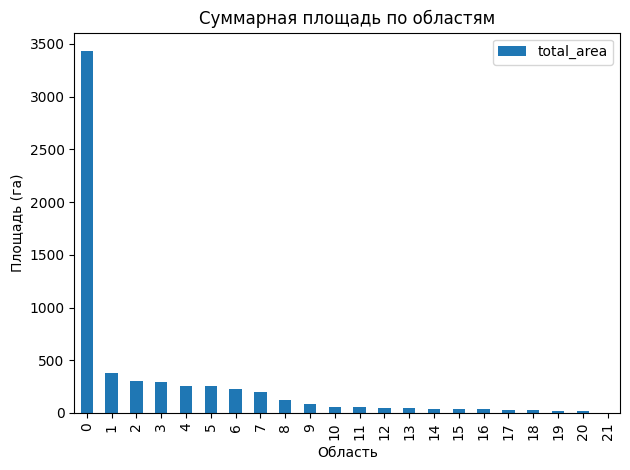

In [8]:
plt.figure()
sum_area.plot(kind='bar')
plt.title("Суммарная площадь по областям")
plt.xlabel("Область")
plt.ylabel("Площадь (га)")
plt.tight_layout()
plt.show()

In [9]:
#2
query= sqlalchemy.text("""
SELECT
oblast,
COUNT(*) AS lot_count
FROM auctions
GROUP BY oblast
ORDER BY lot_count DESC
""")

lots_count= pd.read_sql(query, con=engine)
print(lots_count)

               oblast  lot_count
0           Львівська        202
1            Київська        182
2           Черкаська        130
3         Хмельницька        123
4        Чернігівська        107
5             Одеська        103
6          Полтавська         94
7           Волинська         94
8    Дніпропетровська         83
9          Рівненська         78
10     Кіровоградська         74
11        Чернівецька         72
12       Закарпатська         64
13          Вінницька         44
14      Тернопільська         37
15        Житомирська         30
16  Івано-Франківська         28
17            Сумська         18
18         Харківська         13
19         Запорізька          8
20       Миколаївська          6
21               Київ          6


<Figure size 640x480 with 0 Axes>

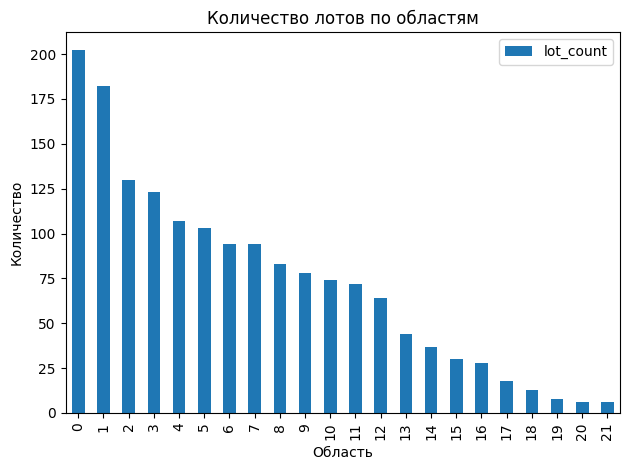

In [10]:
plt.figure()
lots_count.plot(kind='bar')
plt.title("Количество лотов по областям")
plt.xlabel("Область")
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

In [11]:
#3
query = sqlalchemy.text("""
    SELECT
        strftime('%Y', auction_date) AS year,
        oblast,
        COUNT(*) AS lot_count
    FROM auctions
    GROUP BY year, oblast
    ORDER BY year DESC, lot_count DESC
""")

lots_year = pd.read_sql(query, con=engine)
print(lots_year)

    year             oblast  lot_count
0   2023          Львівська        118
1   2023           Київська        110
2   2023          Черкаська         89
3   2023        Хмельницька         81
4   2023            Одеська         75
5   2023       Чернігівська         60
6   2023         Рівненська         60
7   2023         Полтавська         54
8   2023          Волинська         51
9   2023        Чернівецька         43
10  2023     Кіровоградська         43
11  2023   Дніпропетровська         43
12  2023          Вінницька         36
13  2023       Закарпатська         24
14  2023      Тернопільська         23
15  2023            Сумська         17
16  2023        Житомирська         15
17  2023  Івано-Франківська         15
18  2023         Харківська          7
19  2023               Київ          5
20  2023       Миколаївська          3
21  2023         Запорізька          1
22  2022          Львівська         70
23  2022           Київська         52
24  2022       Чернігівсь

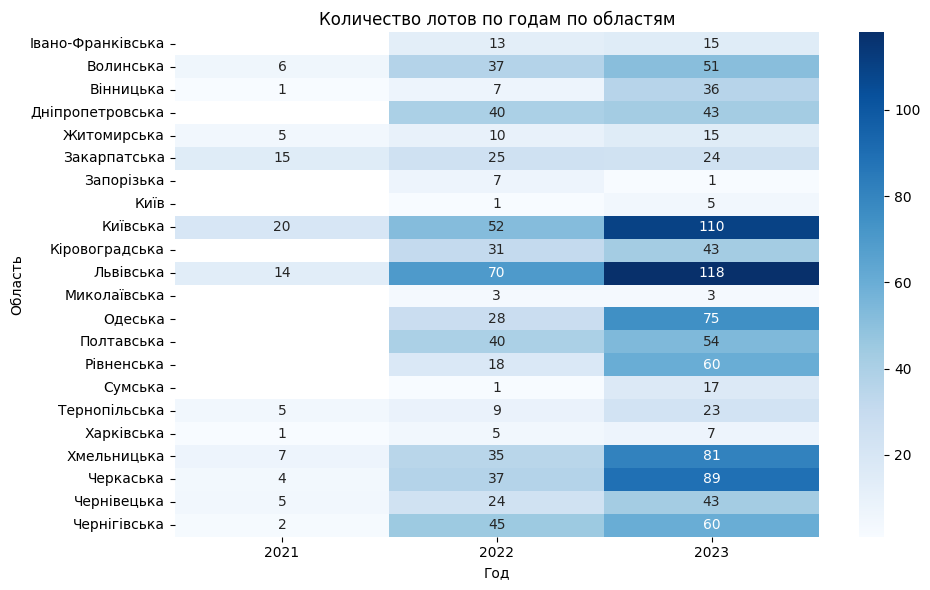

In [12]:
import seaborn as sns
lots_year['lot_count'] = pd.to_numeric(lots_year['lot_count'], errors='coerce')
lots_year['year'] = lots_year['year'].astype(str)
pivot = lots_year.pivot(index='oblast', columns='year', values='lot_count')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="g", cmap="Blues")
plt.title("Количество лотов по годам по областям")
plt.xlabel("Год")
plt.ylabel("Область")
plt.tight_layout()
plt.show()

In [13]:
#4
query = sqlalchemy.text("""
    SELECT
        a.oblast,
        c.classificator_code,
        c.classificator_description,
        COUNT(*) AS lot_count
    FROM auctions a
    JOIN classificator c
        ON a.classificator = c.classificator_code
    GROUP BY a.oblast, c.classificator_code, c.classificator_description
""")

df = pd.read_sql(query, con=engine)

most_common_per_oblast = df.loc[df.groupby('oblast')['lot_count'].idxmax()]

print(most_common_per_oblast)

               oblast classificator_code  \
5   Івано-Франківська         06128000-5   
10          Волинська         06128000-5   
13          Вінницька         06121000-6   
18   Дніпропетровська         06121000-6   
22        Житомирська         06121000-6   
25       Закарпатська         06112000-0   
29         Запорізька         06121000-6   
30               Київ         06111000-3   
36           Київська         06121000-6   
41     Кіровоградська         06121000-6   
44          Львівська         06112000-0   
47       Миколаївська         06121000-6   
49            Одеська         06121000-6   
52         Полтавська         06121000-6   
56         Рівненська         06121000-6   
59            Сумська         06121000-6   
61      Тернопільська         06112000-0   
64         Харківська         06121000-6   
67        Хмельницька         06121000-6   
72          Черкаська         06121000-6   
76        Чернівецька         06112000-0   
82       Чернігівська         06

In [14]:
#5
industrial_lands = df[df['classificator_description'].str.contains('промислов', case=False, na=False)]
count_by_oblast = industrial_lands['oblast'].value_counts()
top_oblast = count_by_oblast.idxmax()
max_count = count_by_oblast.max()
print(f"Больше всего земель под промышленную застройку выставлено в области: {top_oblast} ({max_count} участков)")

Больше всего земель под промышленную застройку выставлено в области: Івано-Франківська (1 участков)


In [15]:
#6
lot_counts = df.groupby(['oblast', 'classificator_description']).size().reset_index(name='lot_count')
lot_counts = lot_counts.sort_values(by='lot_count', ascending=False)
print(lot_counts)

               oblast                          classificator_description  \
0   Івано-Франківська   Землі громадської забудови (землі, які викори...   
1   Івано-Франківська   Землі житлової забудови (землі, які використо...   
2   Івано-Франківська                      Землі оздоровчого призначення   
3   Івано-Франківська   Землі промисловості, транспорту, зв'язку, ене...   
4   Івано-Франківська                    Землі рекреаційного призначення   
..                ...                                                ...   
79        Чернівецька           Землі сільськогосподарського призначення   
80       Чернігівська   Землі громадської забудови (землі, які викори...   
81       Чернігівська   Землі житлової забудови (землі, які використо...   
82       Чернігівська   Землі промисловості, транспорту, зв'язку, ене...   
83       Чернігівська           Землі сільськогосподарського призначення   

    lot_count  
0           1  
1           1  
2           1  
3           1  
4      

***часть 3***

In [16]:
auctions = pd.read_sql("SELECT * FROM auctions", engine)
print(auctions.columns)
df = auctions.merge(customers, how='left', on='customer_edrpou')
df = df.merge(classificator, how='left', left_on='classificator', right_on='classificator_code')
df = df.merge(additional_classificator, how='left', left_on='additional_classificator', right_on='code')
print(df.columns)
df['auction_date'] = pd.to_datetime(df['auction_date'])


Index(['auction_id', 'classificator', 'additional_classificator',
       'lot_description', 'land_area', 'cadastral_number', 'property_type',
       'start_price', 'sale_price', 'customer_edrpou', 'auction_date',
       'expert_eval_price', 'lot_address', 'Latitude', 'Longitude', 'oblast',
       'mortgage'],
      dtype='object')
Index(['auction_id', 'classificator', 'additional_classificator',
       'lot_description', 'land_area', 'cadastral_number', 'property_type',
       'start_price', 'sale_price', 'customer_edrpou', 'auction_date',
       'expert_eval_price', 'lot_address', 'Latitude', 'Longitude', 'oblast',
       'mortgage', 'customer_name', 'customer_address', 'classificator_code',
       'classificator_description', 'classificator_class', 'code',
       'code_description'],
      dtype='object')


In [19]:
import requests
df['auction_date'] = pd.to_datetime(df['auction_date'])
min_date = df['auction_date'].min()
max_date = df['auction_date'].max()
unique_dates = df['auction_date'].dt.strftime('%Y%m%d').unique()

all_rates = []
for date_str in unique_dates:
    url = f"https://bank.gov.ua/NBUStatService/v1/statdirectory/exchange?valcode=EUR&date={date_str}&json"
    response = requests.get(url)
    data = response.json()
    all_rates.extend(data)

eur_rates = pd.DataFrame(all_rates)
eur_rates['exchangedate'] = pd.to_datetime(eur_rates['exchangedate'])
df = df.merge(eur_rates[['exchangedate', 'rate']],
              left_on='auction_date', right_on='exchangedate',
              how='left')
print(df[['auction_date', 'oblast', 'classificator', 'rate']].head())


KeyboardInterrupt: 